# Aim: 
# a. To import an audio file, add noise and then reduce noise
# b. To send a FM modulated signal add noise and reduce the noise at the recieving end.

# Software Needed:
1. Google Colab Hosted IPython Notebook service Or Jupyter Notebook
2. Numpy, Scipy, Soundfile, Noisereduce Libraries
3. Audio Files ( [Get here](https://drive.google.com/file/d/10JMtUVO8SuZanoffox8mlB_BSmK9IpLN/view?usp=sharing))

# Theory:
**Noise reduction** is the process of removing noise from a signal. Noise reduction techniques exists for audio and images. Noise reduction algorithms tends to alter signals to an extent that the noise in the signal reduces. Thus algotitms like this have been worked with several times the past in the feilds of signal processing, statistics, informaton theory and even machine learning.

**Noise** is an unwanted signal which interferes with the original message signal and corrupts the parameters of the message signal. Noise is generally a high frequency signal that is additive in nature. When a signal is transmitted through a channel (transmission media) noise is added to it and therefore the data that we receive at the receiver end is noisy. It is type of a communication impairment.

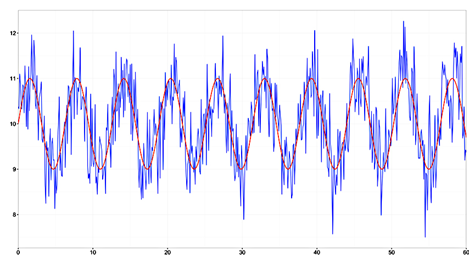

**Fig: An example of noisy Signal**

The best way to deal with it is by improving the SNR of the signal i.e. the signal to noise ratio

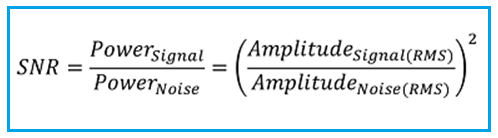

To improve the SNR, we can either increase the signal power or decrease the noise power.

**Noise reduction**
There are many different types of filters that are used to reduce the effects of noise. Like a low pass filter which takes the lower frequencies and rejects the higher frequencies, moving average filter that takes average values at the time and the FIR filter which allows low frequency components.

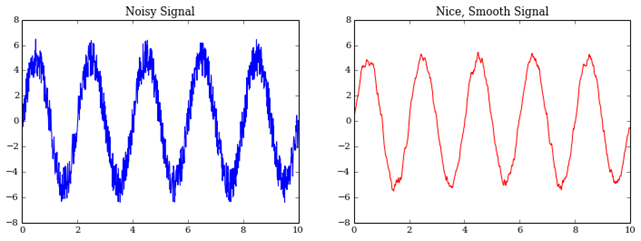

# Noise reduction in python

Here we will be using python code to simulate the waveforms of the signals  and show how noise that is added during transmission of the signal is reduced using a python script by importing the library noisereduce. Apart from that we will be using tensorflow gpu library to speedup the fft and the goussia convolution algorithms.

The noisereduce alorithm require two inputs:
1. A noise signal
2. A message signal

**Main steps of the algorithm**

1. An FFT is calculated over the noise signal.
2. Statistics are calculated over the FFT of the noise in frequency.
3. A threshold is calculated based upon the statistics of the noise.
4. An FFT is calculated based over signal
5. A mask is determined by comparing the signal FFT to the threshold.
6. The mask is smoothed with a filter over frequency and time.
7. The mask is applied to signal and is inverted.

#Code and output

Written By:
1. Debagnik Kar   1804373
2. Sayani Ghoroi  1804406

Installing required python packages

In [ ]:
!pip install tensorflow-gpu==2.0.0-beta
!pip install noisereduce
!pip install soundfile

Importing various library

In [2]:
import IPython
from scipy.io import wavfile as wav
from scipy import signal as sp
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import math as m
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
drive.mount('/content/drive')
data, rate = sf.read('/content/drive/My Drive/Music/music1.wav')
data = data
IPython.display.Audio(data=data, rate=rate)

Mounted at /content/drive


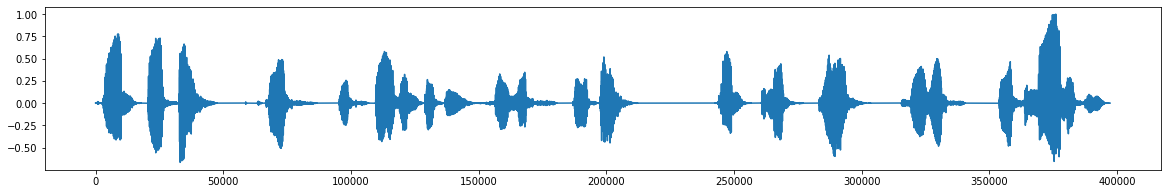

In [4]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

Adding noise

In [5]:
noise_len = 2
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data + noise

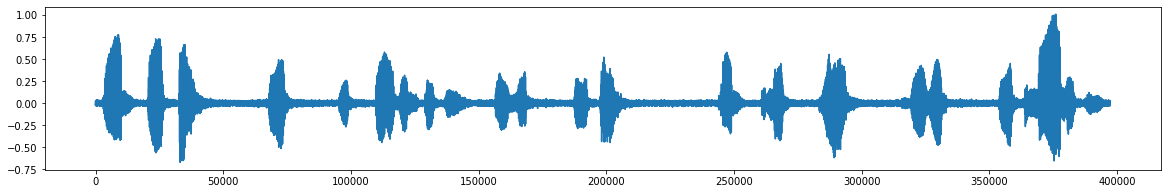

In [6]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [7]:
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

Lets reduce the noise

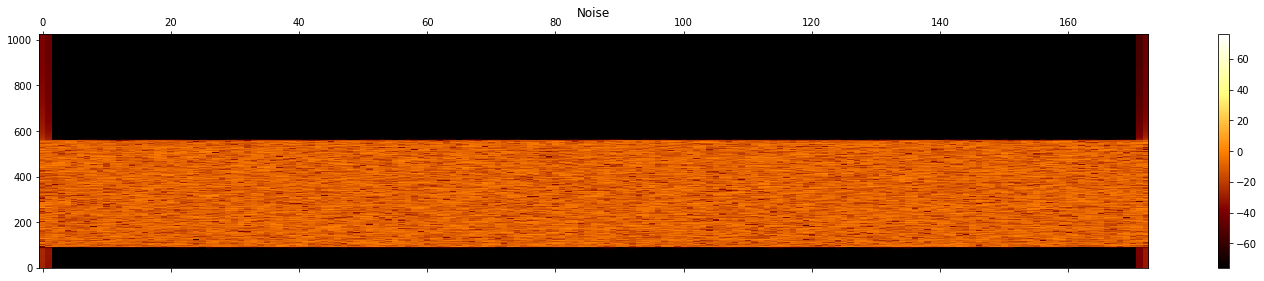

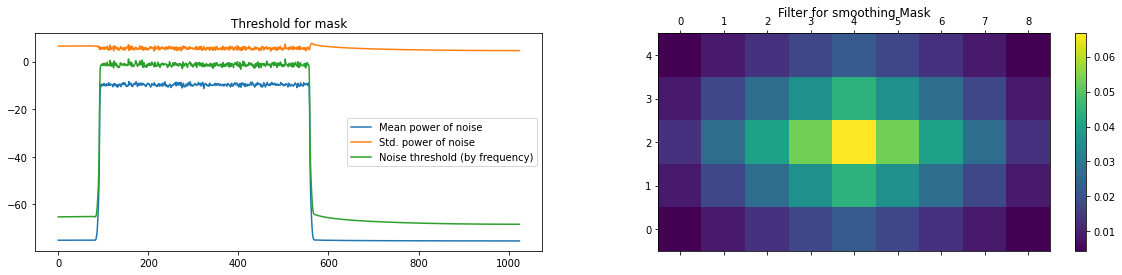

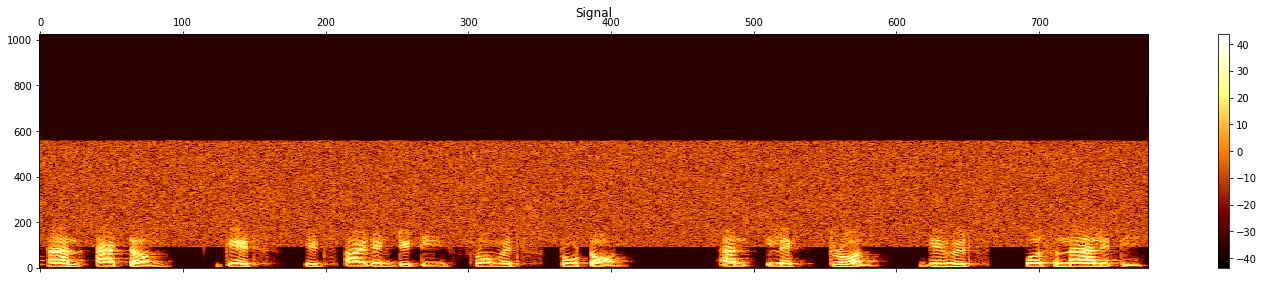

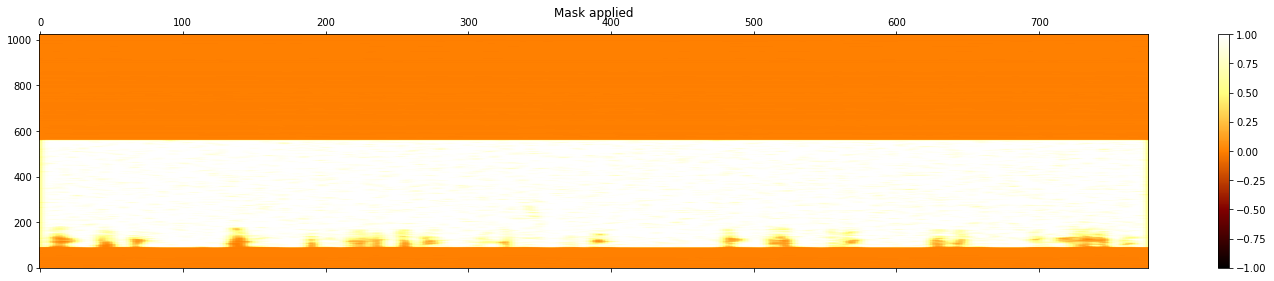

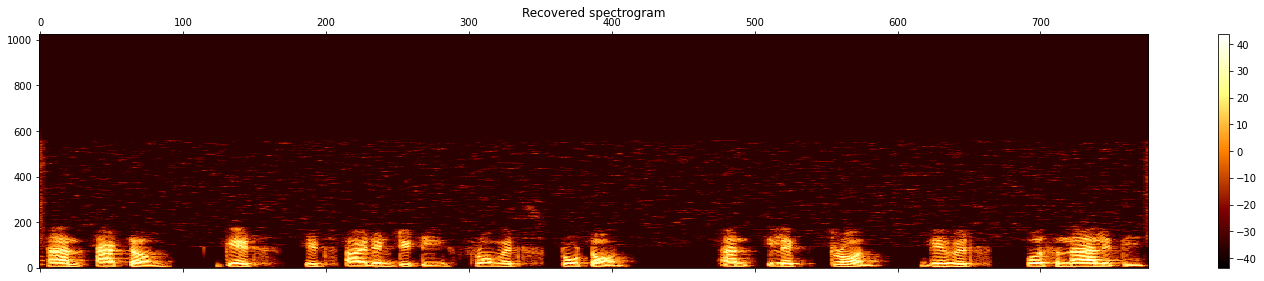

In [8]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_band_limited, noise_clip=noise_clip, prop_decrease=1.0, verbose=True)

In [9]:
IPython.display.Audio(data=noise_reduced, rate=rate)

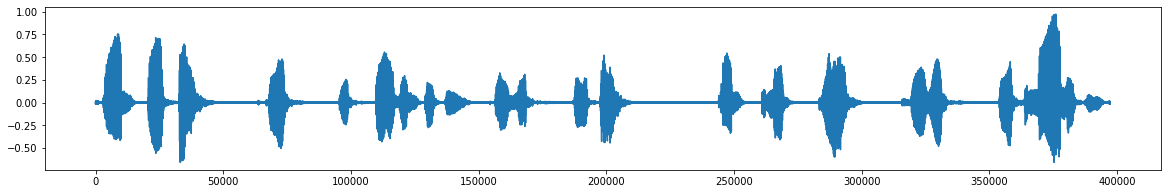

In [10]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_reduced)

**Modulating the signal in FM**

We took a 5Hz Sine wave message signal and a 50 Hz carrier signal to simulate

In [11]:
time = np.linspace(0,1,2000)
message = np.sin(2*m.pi*5*time)
carrier = np.cos(2*m.pi*50*time)

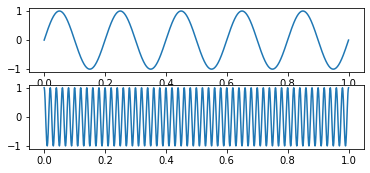

In [12]:
plt.subplot(3,1,1)
plt.plot(time,message)
plt.subplot(3,1,2)
plt.plot(time,carrier)
plt.show()

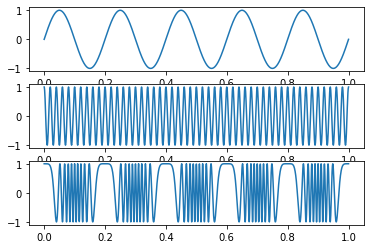

In [13]:
fmsignal = np.cos(2*m.pi*50*time-(5*(np.sin(2*m.pi*5*time)+np.sin(2*m.pi*5*time)))) #mu=5 taken
plt.subplot(3,1,1)
plt.plot(time,message)
plt.subplot(3,1,2)
plt.plot(time,carrier)
plt.subplot(313)
plt.plot(time,fmsignal)

Adding random noise

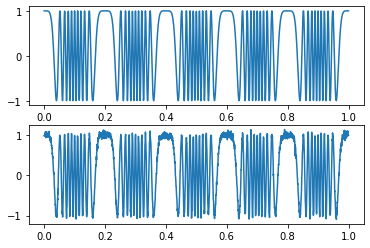

In [14]:
noise = np.random.normal(0,0.05,len(time))
noisysignal = fmsignal+noise
plt.subplot(2,1,1)
plt.plot(time,fmsignal)
plt.subplot(2,1,2)
plt.plot(time,noisysignal)

In [15]:
noisyclip = noise[:len(time)]
reducednoise = nr.reduce_noise(audio_clip=noisysignal,noise_clip=noisyclip ,verbose=False)

In [16]:
dem0 = np.diff(fmsignal)
dem1 = np.diff(noisysignal)
dem2 = np.diff(reducednoise)

dem0 = np.append(dem0, 0)
dem1 = np.append(dem1, 0)
dem2 = np.append(dem2, 0)

rect_dem0 = abs(dem0)
rect_dem1 = abs(dem1)
rect_dem2 = abs(dem2)

In [17]:
b, a = sp.butter(10, 0.0499, 'low')
demod0 = sp.filtfilt(b, a, rect_dem0)
demod1 = sp.filtfilt(b, a, rect_dem1)
demod2 = sp.filtfilt(b, a, rect_dem2)

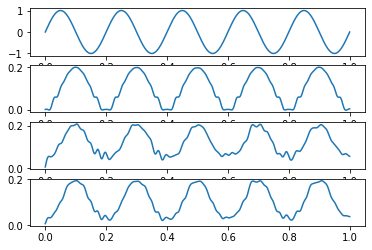

In [18]:
plt.subplot(4,1,1)
plt.plot(time,message)
plt.subplot(4,1,2)
plt.plot(time,demod0)
plt.subplot(4,1,3)
plt.plot(time, demod1)
plt.subplot(4,1,4)
plt.plot(time, demod2)

#Inference
From this open ended project we learned about the effect of noice on a message signal during communication through a channel .we generated a frequency modulated message signal. we also were able to successfully reduce the noise that was added to the signal with the help of a software algorithm that used the library noisereduce , in python. The demodulation of the signals were also done with the help of low pass butterworth filter and all the waveforms were simulated as expected in theory.

#Conclusion
From this project  we  successfully performed noise reduction of a signal using software algorithm in Python and simulated there waveforms.

This notebook is hosted at [Here](https://colab.research.google.com/drive/1vLY2tGqJKseCTcPlpJgGCWG7hPIcuxQ3?usp=sharing)